# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | lodwar
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | bargal
City not found. Skipping...
Processing Record 16 of Set 1 | bandarbeyla
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | lolua
City not found. Skipping...
Processing Record 20 of Set 1 | olinda
Processing Record 21 of Set 1 | seydi
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | saleaula
City not found. Skipping...
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | aden
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | san policarpo
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | tyukalinsk
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | mudgee
Processing Record 0 of Set 5 | trujillo
Processing Record 1 of Set 5 | umm lajj
Processing Record 2 of Set 5 | mikhaylovka
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | shrewsbury
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | bridlington
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | esperance
Processing Record 9 of Set 5 | tecoanapa
Proc

Processing Record 25 of Set 8 | grandview
Processing Record 26 of Set 8 | meiktila
Processing Record 27 of Set 8 | beysehir
Processing Record 28 of Set 8 | bedesa
Processing Record 29 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | boguchany
Processing Record 32 of Set 8 | vossevangen
Processing Record 33 of Set 8 | tabialan
City not found. Skipping...
Processing Record 34 of Set 8 | rong kwang
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | dikson
Processing Record 37 of Set 8 | douglas
Processing Record 38 of Set 8 | broken hill
Processing Record 39 of Set 8 | sarkand
Processing Record 40 of Set 8 | saurimo
Processing Record 41 of Set 8 | canguaretama
Processing Record 42 of Set 8 | mishan
Processing Record 43 of Set 8 | fray bentos
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | minuri
Processing Record 46 of Set 8 |

Processing Record 14 of Set 12 | kingston
Processing Record 15 of Set 12 | adrar
Processing Record 16 of Set 12 | hurghada
Processing Record 17 of Set 12 | abu dhabi
Processing Record 18 of Set 12 | kadugannawa
Processing Record 19 of Set 12 | zarautz
Processing Record 20 of Set 12 | hay river
Processing Record 21 of Set 12 | fort madison
Processing Record 22 of Set 12 | saratov
Processing Record 23 of Set 12 | srandakan
Processing Record 24 of Set 12 | malibu
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | zhigansk
Processing Record 27 of Set 12 | shizunai
Processing Record 28 of Set 12 | taphan hin
Processing Record 29 of Set 12 | bubaque
Processing Record 30 of Set 12 | kieta
Processing Record 31 of Set 12 | matara
Processing Record 32 of Set 12 | conceicao do araguaia
Processing Record 33 of Set 12 | sangueya
Processing Record 34 of Set 12 | priiskovyy
Processing Record 35 of Set 12 | oussouye
Processing Record 36 of Set 12 | gushikawa
Processing Record 37 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,3.79,87,40,8.23,AR,2023-04-16 20:59:11
1,bathsheba,13.2167,-59.5167,29.34,58,20,7.72,BB,2023-04-16 20:53:51
2,nikolskoye,59.7035,30.7861,7.11,60,100,1.32,RU,2023-04-16 21:03:06
3,butaritari,3.0707,172.7902,27.87,77,100,5.15,KI,2023-04-16 21:03:07
4,atuona,-9.8000,-139.0333,27.80,75,4,7.78,PF,2023-04-16 21:00:19


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.79,87,40,8.23,AR,2023-04-16 20:59:11
1,bathsheba,13.2167,-59.5167,29.34,58,20,7.72,BB,2023-04-16 20:53:51
2,nikolskoye,59.7035,30.7861,7.11,60,100,1.32,RU,2023-04-16 21:03:06
3,butaritari,3.0707,172.7902,27.87,77,100,5.15,KI,2023-04-16 21:03:07
4,atuona,-9.8000,-139.0333,27.80,75,4,7.78,PF,2023-04-16 21:00:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'04/16/23'

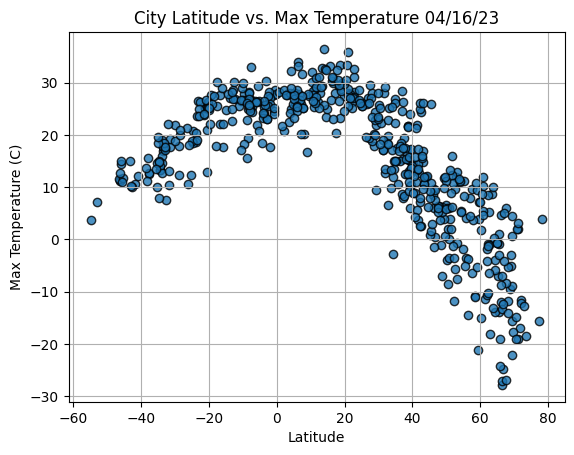

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

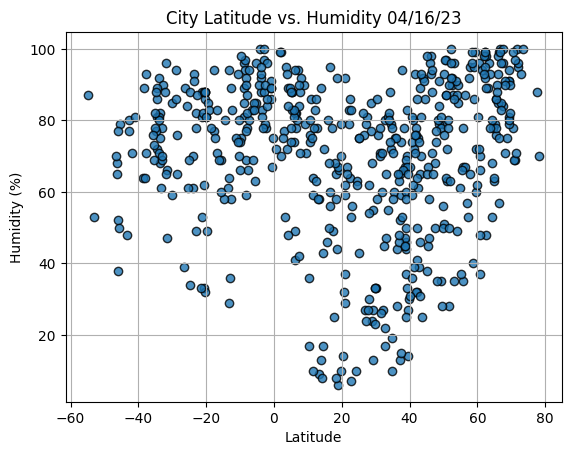

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

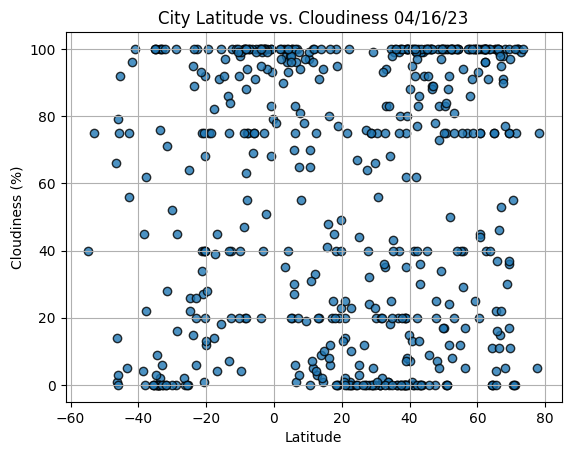

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           clouds,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x") )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

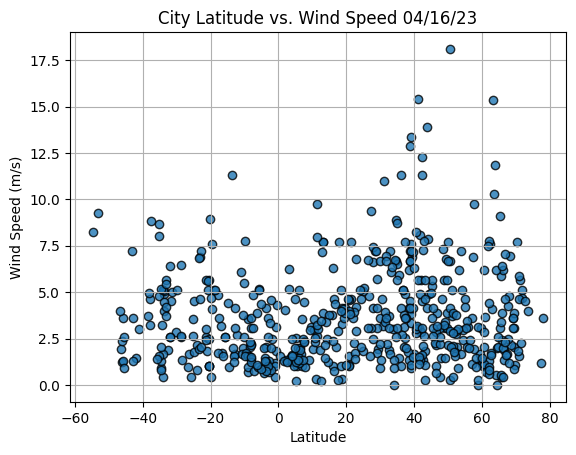

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [122]:
# Create a linear regression function 

def plot_linear_regression(x, y, x_label, y_label):
    # Create a scatter plot
    plt.scatter(x, y)

    # Calculate the linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Add the linear regression line to the plot
    plt.plot(x, line, color='red')

    # Add the linear regression equation to the plot
    plt.plot(x, slope * x + intercept, color='red')
    plt.text(max(x) * 0.0, max(y) * 1.1, f'y = {slope:.2f}x + {intercept:.2f}    R-value = {r_value:.2f}', color='red', bbox=dict(facecolor='white', edgecolor='red'))

    # Set the x-axis and y-axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show the plot
    plt.show()

In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bathsheba,13.2167,-59.5167,29.34,58,20,7.72,BB,2023-04-16 20:53:51
2,nikolskoye,59.7035,30.7861,7.11,60,100,1.32,RU,2023-04-16 21:03:06
3,butaritari,3.0707,172.7902,27.87,77,100,5.15,KI,2023-04-16 21:03:07
7,cabo san lucas,22.8909,-109.9124,28.12,56,0,4.22,MX,2023-04-16 20:53:20
9,sitka,57.0531,-135.3300,7.94,57,75,3.60,US,2023-04-16 20:53:53
...,...,...,...,...,...,...,...,...,...
547,male,4.1748,73.5089,28.97,84,40,1.54,MV,2023-04-16 21:02:03
548,cortez,37.3489,-108.5859,17.42,15,0,3.60,US,2023-04-16 21:05:56
550,bafra,41.5678,35.9069,13.46,76,100,1.14,TR,2023-04-16 21:05:57


In [124]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.79,87,40,8.23,AR,2023-04-16 20:59:11
4,atuona,-9.8000,-139.0333,27.80,75,4,7.78,PF,2023-04-16 21:00:19
5,busselton,-33.6500,115.3333,17.72,82,76,4.92,AU,2023-04-16 21:03:08
6,mataura,-46.1927,168.8643,11.38,68,14,1.26,NZ,2023-04-16 21:03:08
8,ancud,-41.8697,-73.8203,10.52,71,96,1.47,CL,2023-04-16 21:03:08
...,...,...,...,...,...,...,...,...,...
533,kieta,-6.2167,155.6333,26.26,69,69,1.05,PG,2023-04-16 21:05:53
535,conceicao do araguaia,-8.2578,-49.2647,25.73,90,100,2.29,BR,2023-04-16 21:02:11
544,nokaneng,-19.6667,22.2667,22.10,49,28,4.10,BW,2023-04-16 21:05:55


###  Temperature vs. Latitude Linear Regression Plot

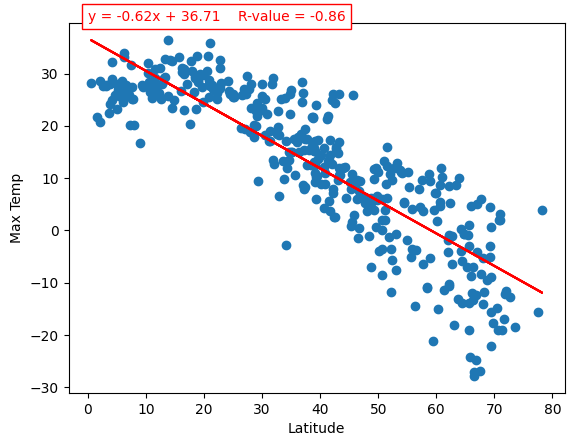

<Figure size 640x480 with 0 Axes>

In [125]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

#set axis labels
x_label = 'Latitude'
y_label = 'Max Temp'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig5.png')

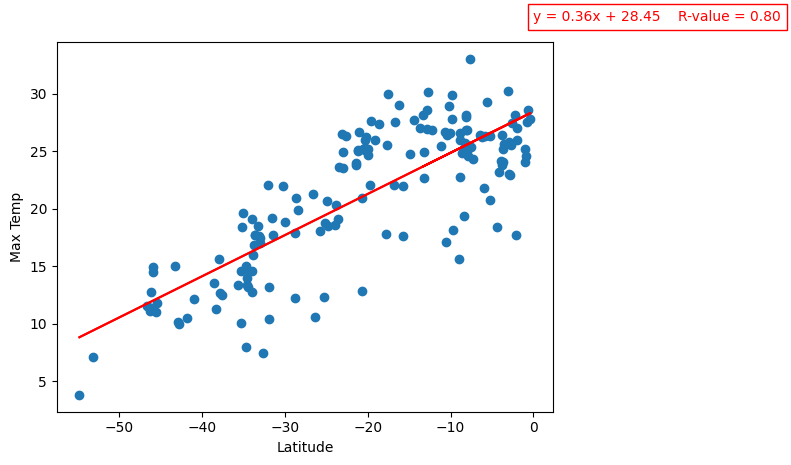

<Figure size 640x480 with 0 Axes>

In [126]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

#set axis labels
x_label = 'Latitude'
y_label = 'Max Temp'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig6.png')

**Discussion about the linear relationship:** From the above charts, one can see that as the latitude increases (gets farther away from the eaquator) the max temperature decreases. Conversely, as the latitude decreases (gets closer to the equator) the max temperature increases. This is what I expected from the data set.

### Humidity vs. Latitude Linear Regression Plot

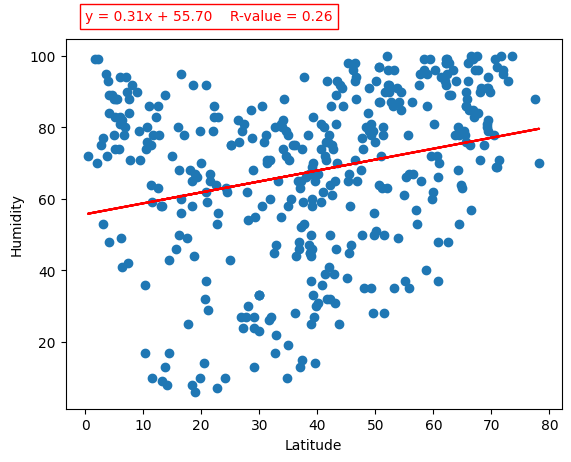

<Figure size 640x480 with 0 Axes>

In [129]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

#set axis labels
x_label = 'Latitude'
y_label = 'Humidity'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig7.png')

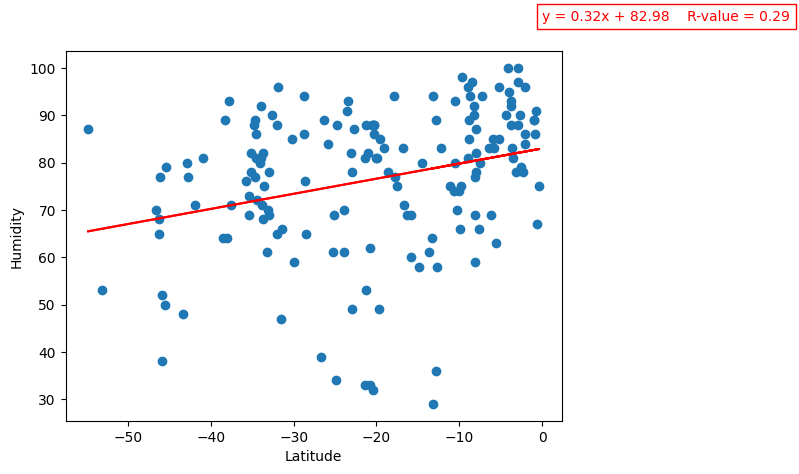

<Figure size 640x480 with 0 Axes>

In [128]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

#set axis labels
x_label = 'Latitude'
y_label = 'Humidity'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig8.png')

**Discussion about the linear relationship:** From these charts, one can see that the humidity generally increases as the latitude moves away from the equator in the northern hemisphere and as it moves towards the equator in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

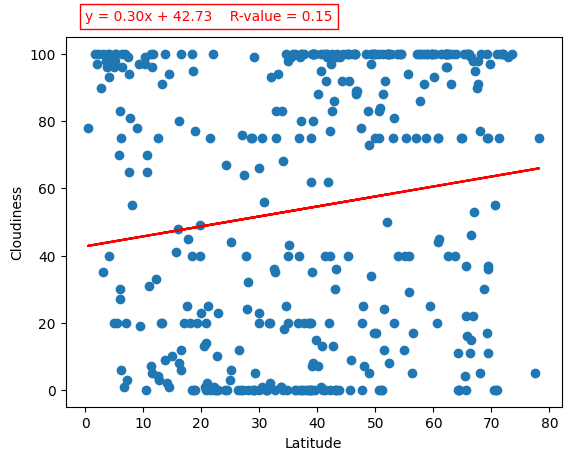

<Figure size 640x480 with 0 Axes>

In [132]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

#set axis labels
x_label = 'Latitude'
y_label = 'Cloudiness'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig9.png')

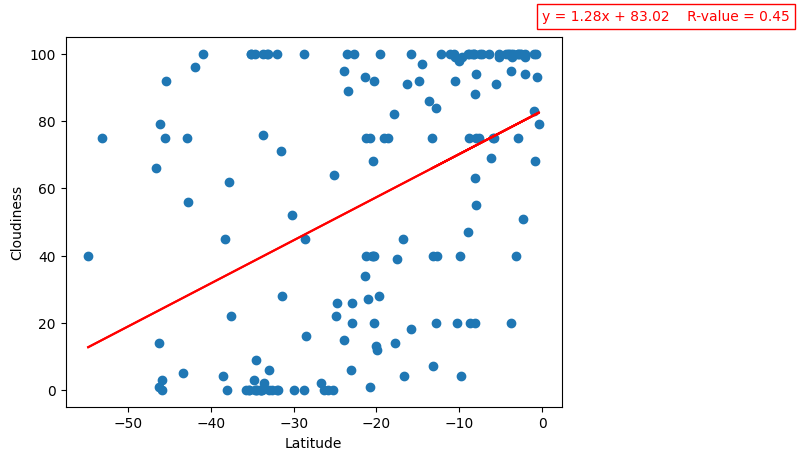

<Figure size 640x480 with 0 Axes>

In [133]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

#set axis labels
x_label = 'Latitude'
y_label = 'Cloudiness'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig10.png')

**Discussion about the linear relationship:** These representations show that the clouds tend to increase in the northern hemisphere as the latitude moves farther away from the equator and in the southern hemisphere as the latitude moves towards the equator.

### Wind Speed vs. Latitude Linear Regression Plot

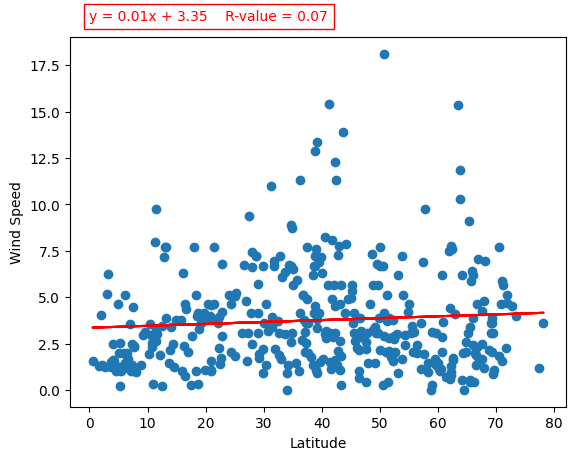

<Figure size 640x480 with 0 Axes>

In [134]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

#set axis labels
x_label = 'Latitude'
y_label = 'Wind Speed'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig11.png')

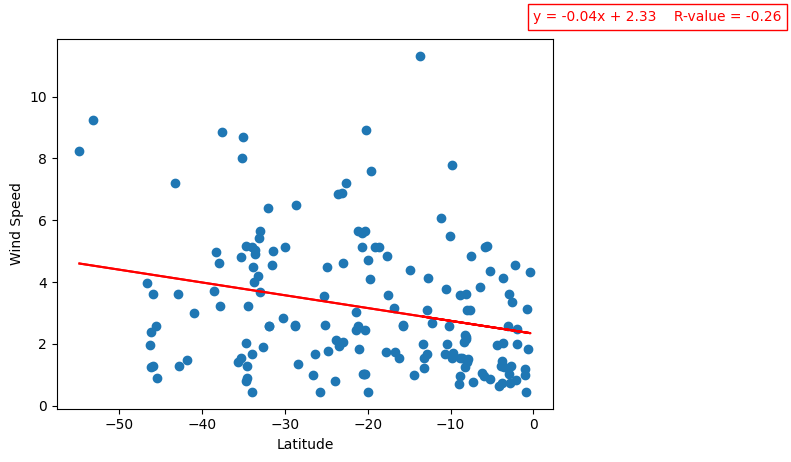

<Figure size 640x480 with 0 Axes>

In [135]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

#set axis labels
x_label = 'Latitude'
y_label = 'Wind Speed'

#set linear regression equation
plot_linear_regression(x, y, x_label, y_label)

plt.savefig('output_data/Fig12.png')

**Discussion about the linear relationship:** Since both of the r values are low for the northern and southern hemisphere, there is close to no correlation for these two variables. However, there is a slight positive correlation for the northern hemisphere and a slight positive correlation for the southern hemisphere.